# test.pyの検証

下記のエラーが発生した。

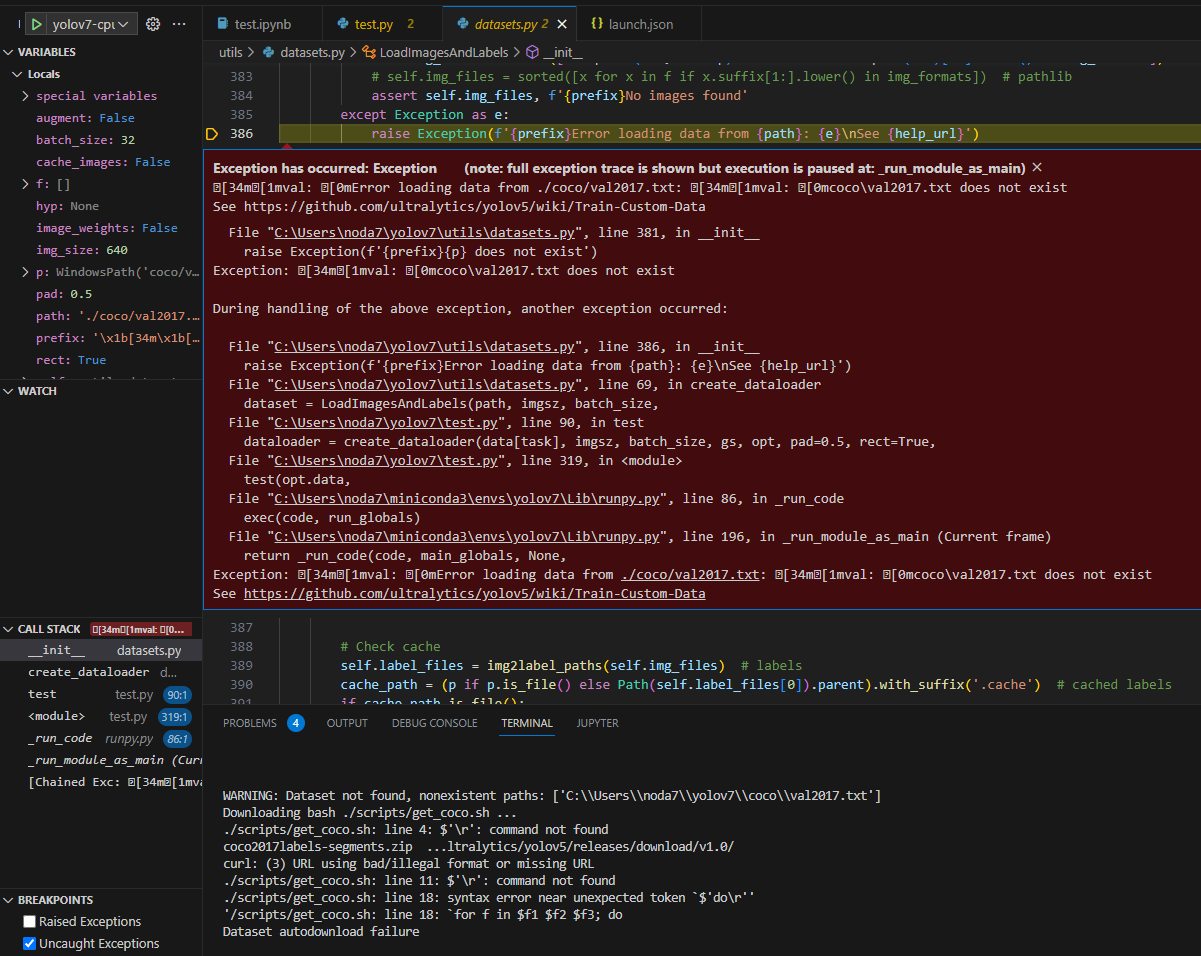

なぜかshによるダウンロードができないため手動でダウンロードした。  
1. 次のサイトからzipファイルをダウンロードする。https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017labels-segments.zip  
2. zipファイルを解凍してcocoフォルダを./に保存する
3. scripts/get_coco.shからcocoフォルダのダウンロードをスキップする

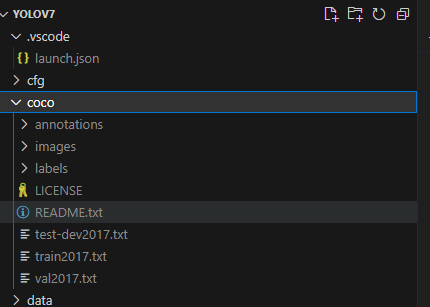

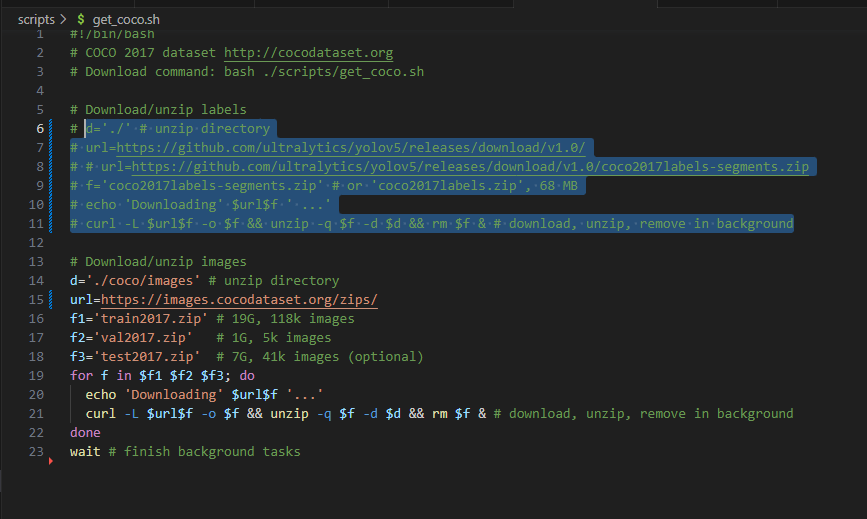

cocoデータセットもなぜかshによるダウンロードができないため手動でダウンロードした。  
1. 次のサイトからzipファイルをダウンロードする。  
   * http://images.cocodataset.org/zips/train2017.zip 
   * http://images.cocodataset.org/zips/val2017.zip 
   * http://images.cocodataset.org/zips/test2017.zip 
2. zipファイルを解凍してcocoフォルダを./images/に保存する
3. scripts/get_coco.shからcocoフォルダのダウンロードをスキップする

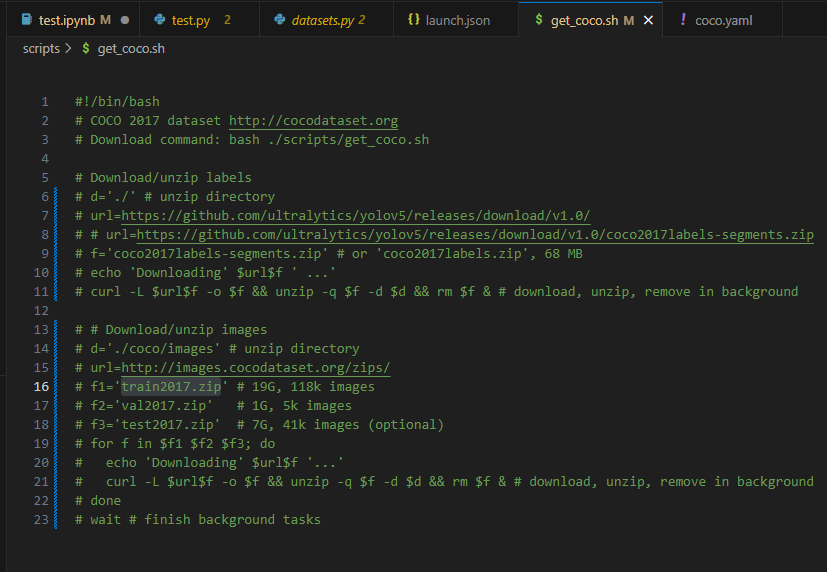

実行できた。結果は、yolov7_640_val12に保存された。

# 1枚だけで推論を実行してみる

```
python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source inference/images/horses.jpg
```

エラーとなった。

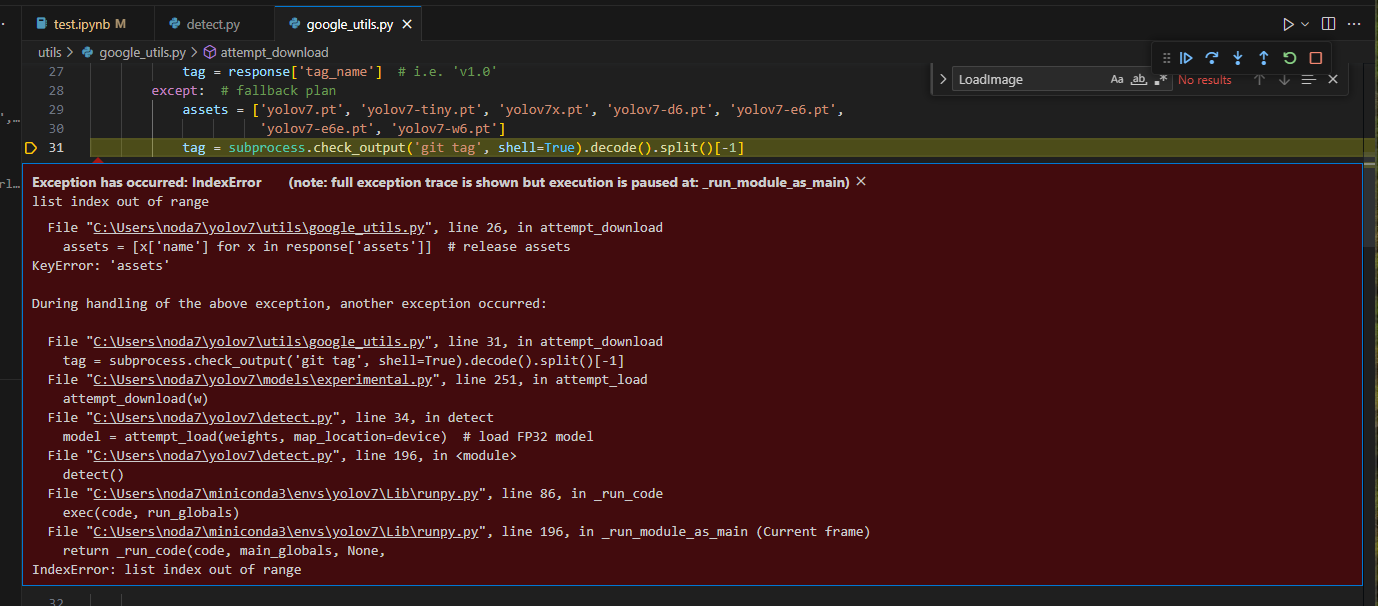

weightsファイルがないためエラーとなっていたため、今回ダウンロードしたyolov7.ptを指定する。

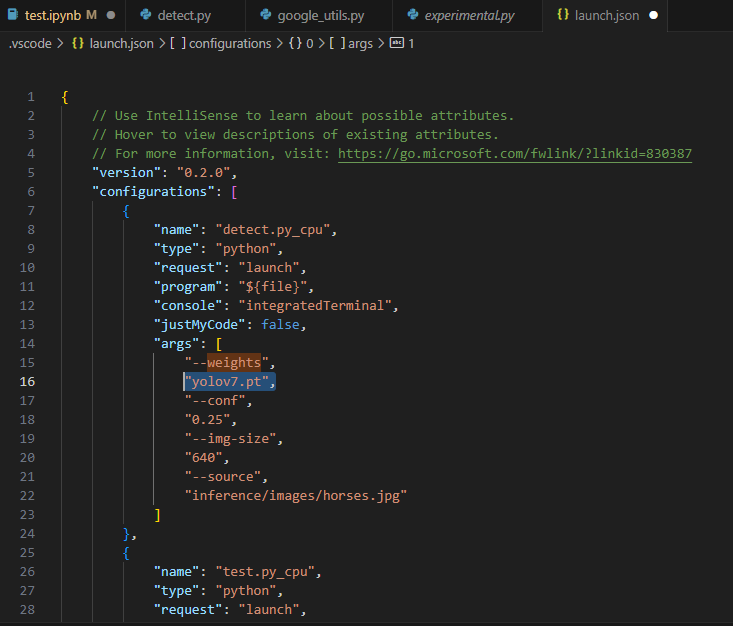

うまく推論ができた。

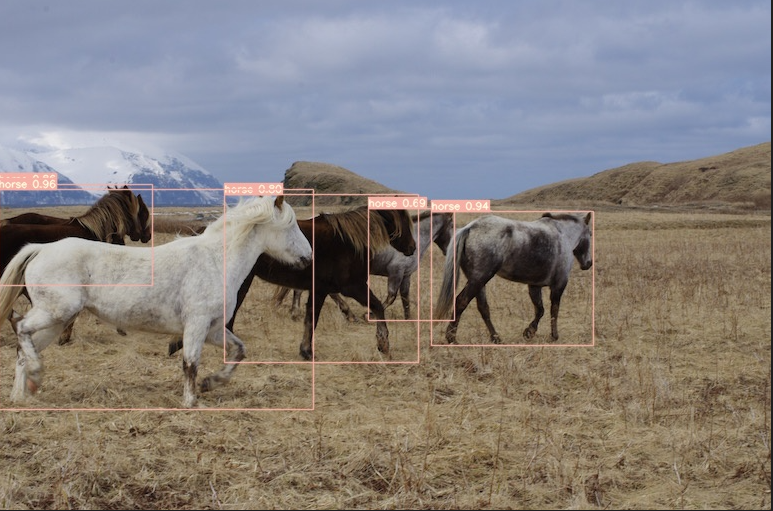

# 複数枚の画像をフォルダに保存してsourceに指定して推論してみる

./infoerence/images/testに2枚の画像を保存して、sourceに指定する。

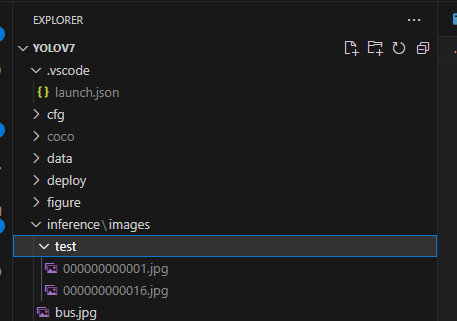

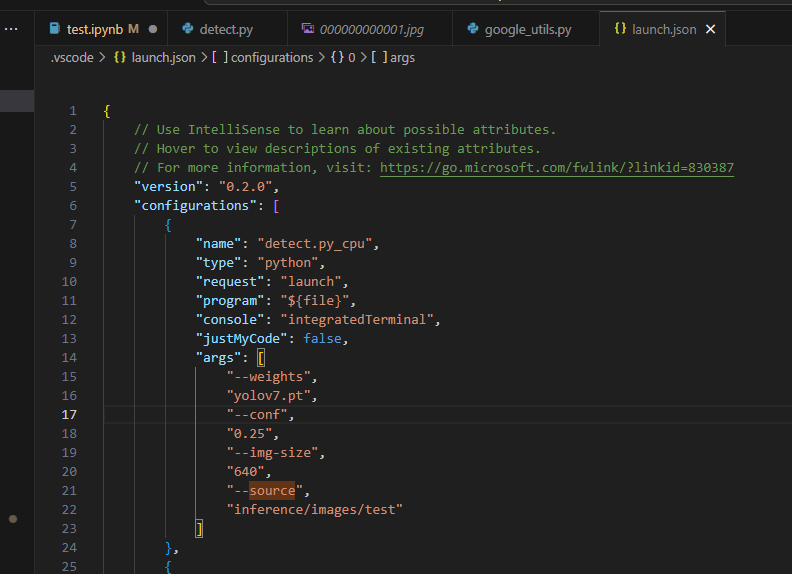

2枚とも推論できた。

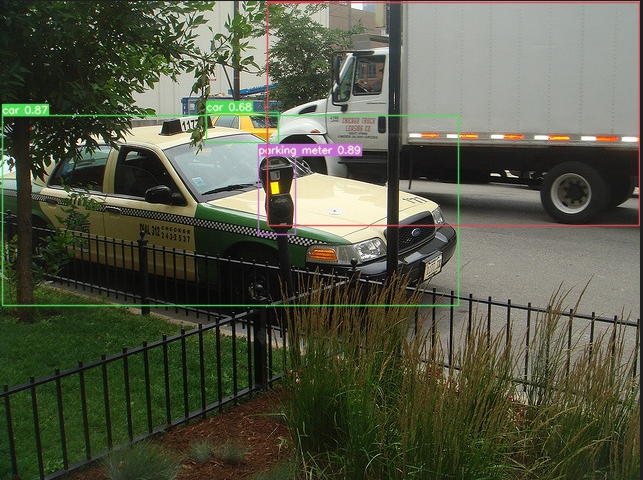

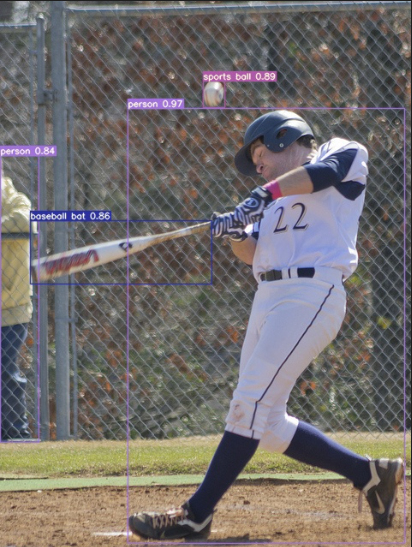

# CPUでの実行時間検証

deviceをcpuに指定して実行する。

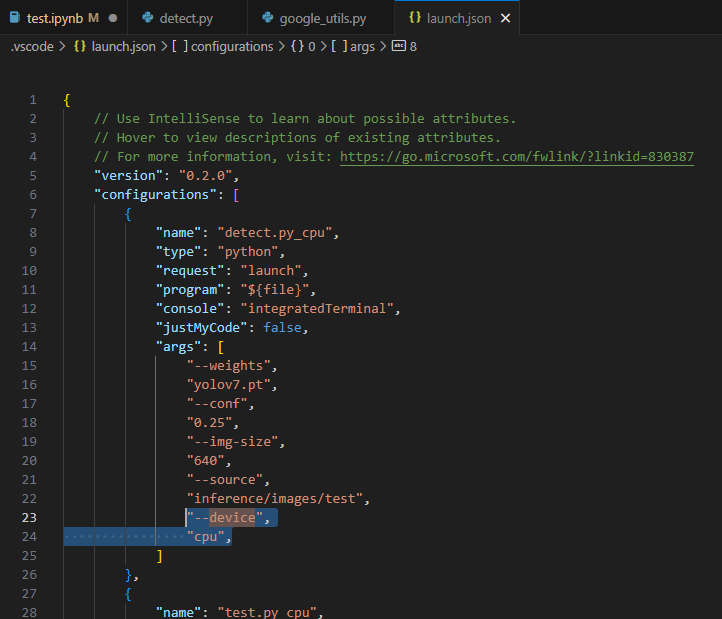

inference/images/testに100枚の画像を保存して、sourceに指定する。

timeライブラリを使って実行時間を計測する。

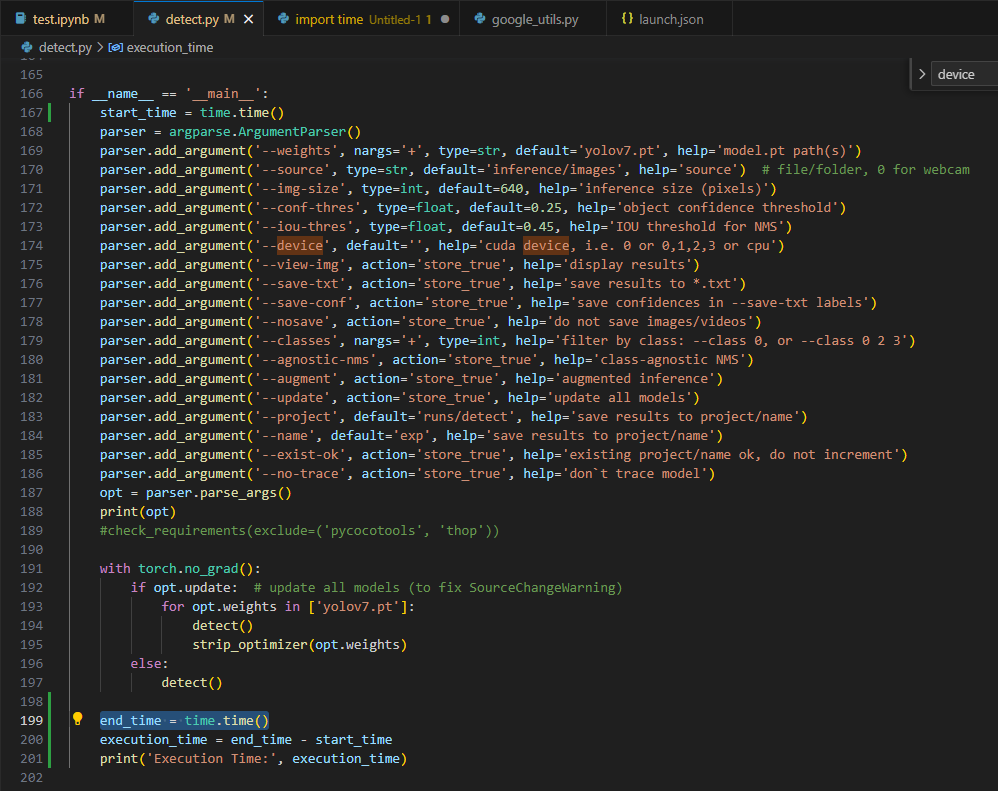

この時、デバッグなしで実行する。

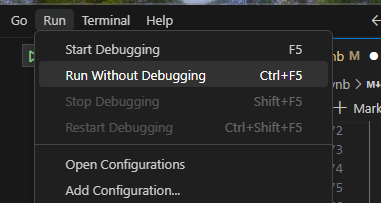

結果、100枚の画像で32.7秒かかった。

# GPUでの実行時間検証

GPUで100枚の画像の実行時間を計測する。

GPU用の仮想環境を作成する。  
```
conda create -n yolov7gpu python=3.10
conda activate yolov7gpu
pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118
pip install -r requirements.txt
```

where pythonでyolov7gpuのpython.exeのパスを確認し、launch.jsonのpythonに指定することでconda仮想環境を指定して実行できる。  
また、deveiceは0を指定することでGPUを指定できる。

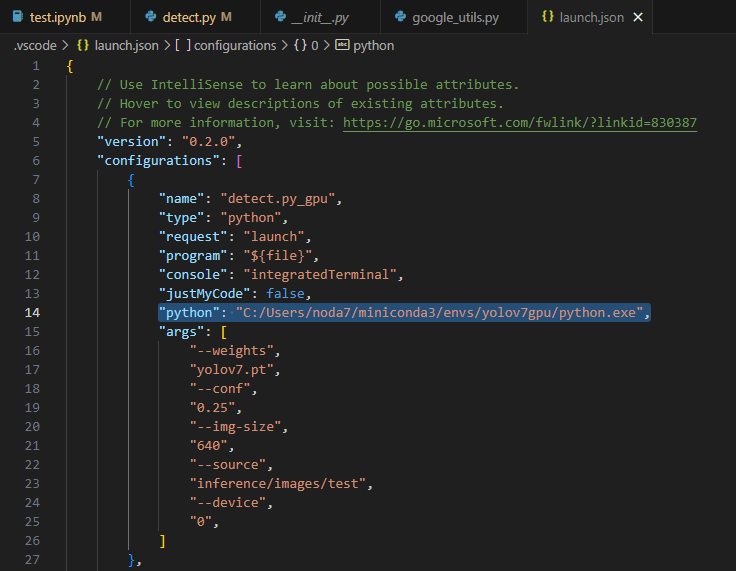

実行した結果、100枚が6.9秒で実行できた。

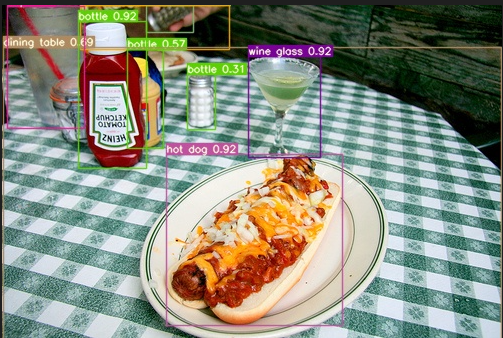

# annotated imagesを保存せず、txtを保存するように変更する

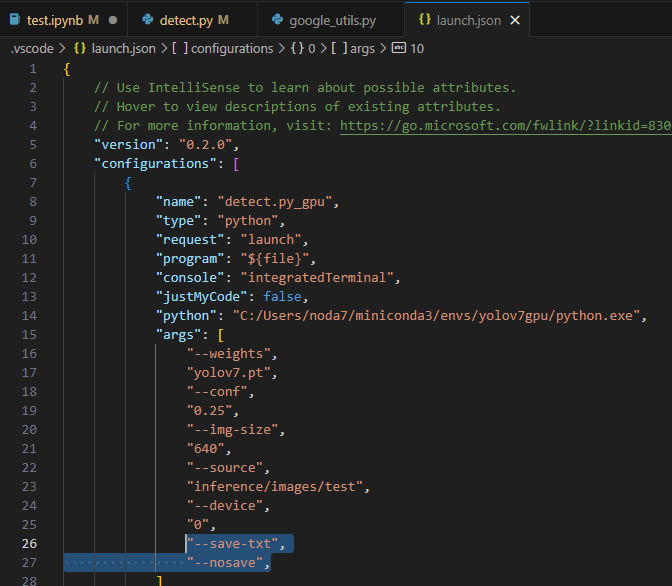

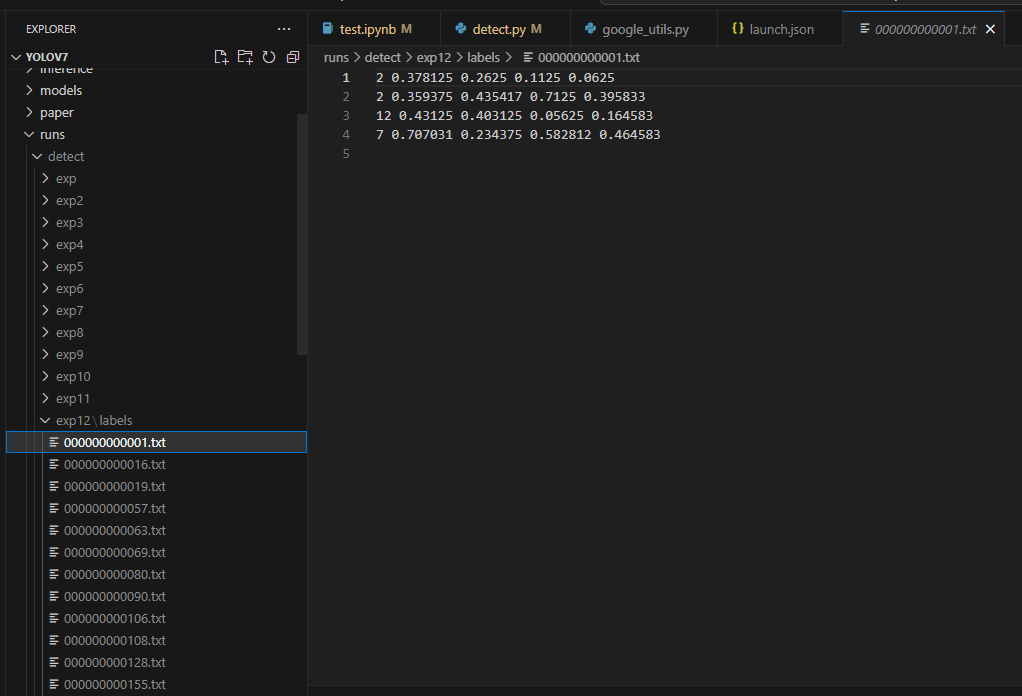

各画像に対して、推論結果をtxtファイルに保存するように変更した。  
検出されたクラスのNoとバウンディングボックスの中央の座標とwidthとheightが保存されている。

実行時間はGPUで100枚で6.8秒だった。

# プロセスの立ち上げ時間など、推論以外の時間を計測する

## GPUの場合

inference/images/testに1000枚の画像を保存して、sourceに指定する。

1000枚で29.7秒かかった。

inference/images/testに1枚の画像を保存して、sourceに指定する。

1枚で3.6秒かかった。

inference/images/testに2枚の画像を保存して、sourceに指定する。

2枚で3.8秒かかった。

inference/images/testに3枚の画像を保存して、sourceに指定する。

3枚で3.81秒かかった。

inference/images/testに4枚の画像を保存して、sourceに指定する。

4枚で3.84秒かかった。

inference/images/testに3000枚の画像を保存して、sourceに指定する。

3000枚で72.5秒かかった。

グラフにしてみる。

In [4]:
from matplotlib import pyplot as plt

x = [1, 2, 3, 4, 1000, 3000,]
y = [3.6, 3.8, 3.81, 3.84, 29.7, 72.5,]
plt.xlabel('Number of images')
plt.ylabel('Time (s)')
plt.title('Time taken to process images')

plt.plot(x, y)
plt.show()

In [8]:
import numpy as np

x = [1, 2, 3, 4, 1000, 3000,]
y = [3.6, 3.8, 3.81, 3.84, 29.7, 72.5,]
a,b=np.polyfit(x,y,1)
a = round(a, 2)
b = round(b, 2)
print(f"傾き:{a}, 切片:{b}")
print(f"FastAPI GPU 1枚当たりの処理時間: {a}秒, 立ち上げ時間: {b}秒")

傾き:0.02, 切片:4.12
FastAPI GPU 1枚当たりの処理時間: 0.02秒, 立ち上げ時間: 4.12秒


1枚当たりの処理に0.02秒かかっている。  
また、立ち上げに4.1秒かかっている。

## CPUの場合

3000枚で、870秒かかった。  
1000枚で、301.7秒かかった。  
100枚で、31.4秒かかった。  
10枚で、5.8秒かかった。  
5枚で、4.5秒かかった。  
1枚で、3.4秒かかった。

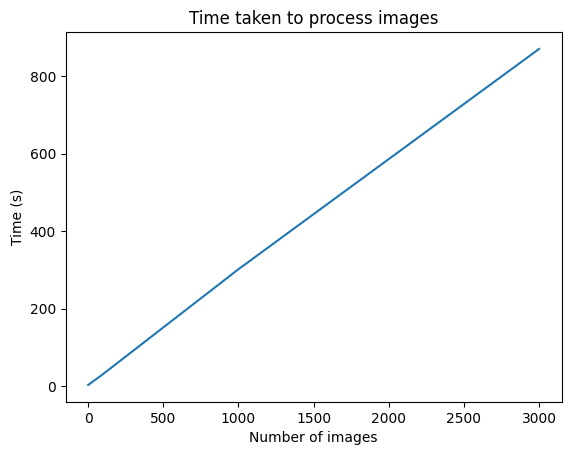

In [2]:
from matplotlib import pyplot as plt

x = [1, 5, 10, 100, 1000, 3000,]
y = [3.4, 4.5, 5.8, 31.4, 301.7, 870,]
plt.xlabel('Number of images')
plt.ylabel('Time (s)')
plt.title('Time taken to process images')

plt.plot(x, y)
plt.show()

In [9]:
import numpy as np

x = [1, 5, 10, 100, 1000, 3000,]
y = [3.4, 4.5, 5.8, 31.4, 301.7, 870,]
a,b=np.polyfit(x,y,1)
a = round(a, 2)
b = round(b, 2)
print(f"傾き:{a}, 切片:{b}")
print(f"FastAPI CPU 1枚当たりの処理時間: {a}秒, 立ち上げ時間: {b}秒")

傾き:0.29, 切片:4.23
FastAPI CPU 1枚当たりの処理時間: 0.29秒, 立ち上げ時間: 4.23秒


1枚当たりの処理に0.29秒かかっている。  
また、立ち上げに4.23秒かかっている。

# GPUとCPUの比較

1枚当たりの処理時間は、GPUが0.02秒、CPUが0.29秒であった。  
GPUの方がCPUよりも14.5倍早い。  
また、GPUの方が立ち上げに4.1秒かかっているのに対して、CPUは4.23秒かかっている。

# FastAPIを使用した立ち上げ時間の削減

FastAPIを使用して、サーバーを立ち上げる。  
サーバーを立ち上げるときに、モデルを読み込む。  
推論を実行するときに、モデルを使用する。  
サーバーを立ち上げるときに、モデルを読み込むので、推論を実行するときにモデルを読み込む必要がなくなる。  
そのため、推論を実行するときの立ち上げ時間が削減できる。

my_fastapi.pyを作成する。  


必要なライブラリをインストールする。
```
pip install fastapi uvicorn
```
サーバーを立ち上げる。
```
uvicorn my_fastapi:app --reload
```

うまく立ち上がった。

my_post.pyを作成し、postしてみる。  
立ち上げ時間を含め、1枚処理するのに、3.3秒かかった。

my_fastapi.pyにて、下記のpost処理時にdetect.pyを実行していた。  
my_fastapi.py
```
@app.post("/detect/")
async def detect(params: DetectionParams):
```

そのdetect.pyの立ち上げ時の処理をサーバー立ち上げ時の1回のみするように変更した。  
具体的には、@app.on_event("startup")でサーバーの立ち上げ時に１回のみ実行し、golobal変数に結果を保存して使いまわすようにした。  
my_fastapi.py
```
@app.on_event("startup")
async def load_model_on_startup(
```

立ち上げ時間を削減することで、最初の1枚目から1枚当たり0.31秒で処理できるようになった。

なお、実行は、python my_post.pyコマンドを使用する。

# FastAPIサーバーへの同時リクエスト処理の検証

my_post_concurrent.pyを作成する。

処理できたが、リクエストを１つずつ順番に処理していた。

各リクエストの処理時間は10枚で4.1秒だった。

# FastAPIサーバーの並列処理の実装

FastAPIのエンドポイントで、推論タスクをバックグラウンドで実行し、その結果を後で取得できるようにします。これにはFastAPIのBackgroundTasksを使用します。

このコードでは、/detect/エンドポイントが呼び出されるたびに新しいプロセスが作成され、そのプロセスでdetect_api関数が実行されます。その結果、複数のリクエストが同時に来た場合でも、それぞれのリクエストが別のプロセスで並列に処理されます。

ただし、このアプローチにはいくつかの制限があります：

* プロセス間通信は比較的遅いため、大量のデータをプロセス間でやり取りする必要がある場合、パフォーマンスが低下する可能性があります。
バックグラウンドタスクで結果を保存する方法は示していません。これはアプリケーションの要件によります（例えば、結果をデータベースに保存する、ファイルに書き込む、メッセージキューに送信するなど）。
* エラーハンドリングは考慮していません。例えば、detect_api関数が例外をスローすると、その例外はメインプロセスに伝播せず、結果としてキューには何も追加されません。この問題を解決するためには、detect_api関数内で例外を適切に処理し、エラーメッセージをキューに追加するなどの対策が必要です。

```
from fastapi import FastAPI, BackgroundTasks
from pydantic import BaseModel
from typing import List, Optional
from multiprocessing import Process, Queue
from detect import detect_api

app = FastAPI()

class DetectionParams(BaseModel):
    # ここにパラメータを定義します。
    # ...

@app.post("/detect/")
async def detect(background_tasks: BackgroundTasks, params: DetectionParams):
    # リクエストごとに結果を保存するためのキューを作成します。
    queue = Queue()

    # 推論タスクを新しいプロセスで実行します。
    process = Process(target=detect_api, args=(queue, params))
    process.start()

    # プロセスの終了を待つタスクをバックグラウンドでスケジュールします。
    background_tasks.add_task(wait_for_process, process, queue)

    return {"message": "The detection task has been started."}

async def wait_for_process(process: Process, queue: Queue):
    # プロセスが終了するのを待ちます。
    process.join()

    # 結果をキューから取得します。
    result = queue.get()

    # ここで結果をどこかに保存します（例えば、データベースやファイルなど）。
    # ...
```

しかし、実行すると次のエラーが出た。  
RuntimeError: Tried to serialize object __torch__.models.yolo.Model which does not have a __getstate__ method defined!

> このエラーは、Pythonのmultiprocessingモジュールがプロセス間でデータを共有するためにオブジェクトをシリアライズ（つまり、バイト列に変換）しようとしたときに発生します。しかし、__torch__.models.yolo.Modelオブジェクト（おそらくPyTorchのYOLOモデル）は、シリアライズ方法を定義する__getstate__メソッドを持っていません。
> 
> Pythonのmultiprocessingモジュールは、デフォルトでpickleというシリアライズモジュールを使用します。しかし、pickleは、すべてのPythonオブジェクトをシリアライズできるわけではありません。特に、PyTorchのモデルのような複雑なオブジェクトは、pickleによるシリアライズがサポートされていません。
> 
> この問題を解決するためには、モデルをプロセス間で共有する代わりに、各プロセスでモデルを個別にロードすることを検討してみてください。これにより、シリアライズの問題を回避できます。
> 
> ただし、このアプローチには一つの欠点があります。それは、各リクエストでモデルをロードするため、リクエストの処理時間が増加する可能性があるということです。これを緩和するためには、モデルをメモリにキャッシュするなどの方法が考えられますが、それは別の問題を引き起こす可能性があります（例えば、メモリ使用量の増加など）。
> 
> この問題は、Pythonのmultiprocessingモジュールの制限によるものであり、その他の言語やフレームワークでは異なる解決策が可能であることに注意してください。例えば、GoやNode.jsのような言語では、すべてのゴルーチンやスレッドが同じメモリ空間を共有するため、このような問題は発生しません。

これでは、リクエストのたびに立ち上げ時間がかかる。  

# リクエスト毎の立ち上げ時間を削減しつつ、並列処理を行う方法の調査

C#のSystem.Diagnostics.Processを使用する
* このアプローチはPythonとC#の間でデータをやり取りする必要があり、これには追加のオーバーヘッドが発生します。

マルチプロセッシングとモデルのキャッシュ化の組み合わせ
* このアプローチは、メモリ使用量の増加などの問題を引き起こす可能性があります。

onnx runtimeを活用する
>
>モデルのロード時間の削減と並列処理を実現することが可能です。 
> 
>ONNX Runtimeは、ONNX(Open Neural Network Exchange)形式のモデルを効率的に実行するためのクロスプラットフォームのパフォーマンスランタイムです。ONNX Runtimeは、ハードウェアアクセラレーションをサポートしており、CPUとGPUの両方で最適化されたパフォーマンスを提供します。
>  
>ONNX Runtimeを使用すると、モデルのロード時間を削減できます。これは、ONNX Runtimeがモデルを一度だけロードし、その後の推論リクエストで再利用するためです。これにより、各リクエストでモデルをロードする必要がなくなり、リクエストごとの立ち上げ時間が削減されます。  
>
>また、ONNX Runtimeは並列推論をサポートしています。これは、ONNX Runtimeが複数のスレッドを使用して同時に複数の推論リクエストを処理することを可能にするためです。これにより、リクエストの処理速度が向上し、全体的なスループットが向上します。  
>
>ただし、ONNX Runtimeを使用するには、モデルをONNX形式に変換する必要があります。これは、一部のモデルやフレームワークでは難しい場合があります。また、ONNX RuntimeはPythonだけでなく、C++やC#などの他の言語からも使用することが可能です。

## onnxファイルへの変換

```
# yolov7.ptをonnxに変換する。
python export.py --weights yolov7.pt --grid --end2end --simplify --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640 --max-wh 640
```

# onnx runtimeの検証

## CPUでの検証

yolov7の公式GitHubにリンクが貼ってあった例をもとに、detect_onnx_example.pyを作成する。
https://colab.research.google.com/github/WongKinYiu/yolov7/blob/main/tools/YOLOv7onnx.ipynb#scrollTo=Ifw8pYU11Ske

モデルの立ち上げ時間とannotated imageの保存を含め、CPUで10枚処理するのに1.88秒かかった。  
annotated imageの保存をしないとCPUで処理するのに1.81秒だった。

```
from glob import glob
import random
import requests
import time

import cv2
import numpy as np
import onnxruntime as ort
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple

cuda = False
w = "./yolov7.onnx"

providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if cuda else ['CPUExecutionProvider']
session = ort.InferenceSession(w, providers=providers)


def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

start_time = time.time()

names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 
         'hair drier', 'toothbrush']
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

# Prepare your images
target_folder_path = './inference/images/test'
img_paths = glob(target_folder_path + '/*.jpg')
# runs/detectフォルダ中のフォルダのリストを確認し、exp+連番+1となるよう、画像をruns/detectの下のexp+連番のフォルダに保存
save_folder_parent_path = './runs/detect'
exp_folders = glob(save_folder_parent_path + '/exp*')
exp_nums = [int(exp_folder.split('\\')[-1].replace('exp','')) for exp_folder in exp_folders if exp_folder.split('\\')[-1].replace('exp','').isdigit()]
print(f"exp_nums: {exp_nums}")
if exp_nums == []:
    save_folder_num = 0
else:
    # exp_numsからint以外を除外する
    exp_nums = [int(exp_num) for exp_num in exp_nums if isinstance(exp_num, int)]
    # exp_numsの最大値を取得し、+1する
    save_folder_num = max(exp_nums) + 1
print(f"save_folder_parent_path: {save_folder_parent_path}")
save_folder_path = save_folder_parent_path + '/exp' + str(save_folder_num)
if not Path(save_folder_path).exists():
    Path(save_folder_path).mkdir(parents=True, exist_ok=True)

print(img_paths)
for img_path in img_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    image = img.copy()
    image, ratio, dwdh = letterbox(image, auto=False)
    image = image.transpose((2, 0, 1))
    image = np.expand_dims(image, 0)
    image = np.ascontiguousarray(image)
    
    im = image.astype(np.float32)
    im /= 255
    im.shape
    
    outname = [i.name for i in session.get_outputs()]
    outname
    
    inname = [i.name for i in session.get_inputs()]
    inname
    
    inp = {inname[0]:im}

    outputs = session.run(outname, inp)[0]
    print(outputs)

    ori_images = [img.copy()]

    for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(outputs):
        image = ori_images[int(batch_id)]
        box = np.array([x0,y0,x1,y1])
        box -= np.array(dwdh*2)
        box /= ratio
        box = box.round().astype(np.int32).tolist()
        cls_id = int(cls_id)
        score = round(float(score),3)
        name = names[cls_id]
        color = colors[name]
        name += ' '+str(score)
        cv2.rectangle(image,box[:2],box[2:],color,2)
        cv2.putText(image,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)  
    
    save_image_path = save_folder_path + '/' + img_path.split('\\')[-1]
    print(f"save_image_path: {save_image_path}")
    Image.fromarray(ori_images[0]).save(save_image_path)

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time:', execution_time)
```

1000枚で138.7秒かかった。  
1枚で0.16秒かかった。

## GPUでの検証

10枚で8.72秒となぜかCPUより遅かった。

1000枚で25秒だった。  
1枚で8.55秒だった。

## CPUとGPUの比較

### CPU

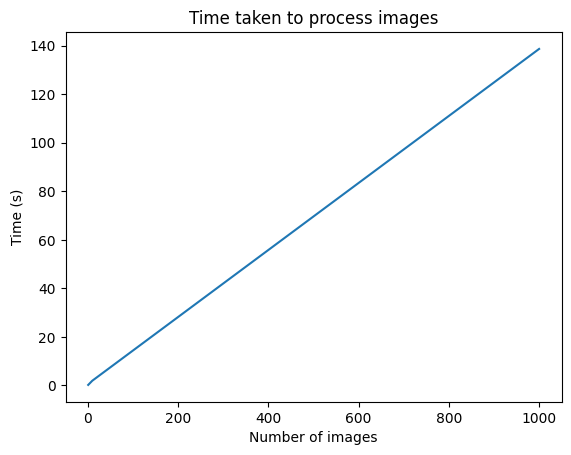

傾き:0.14, 切片:0.26
ONNX Runtime CPU 1枚当たりの処理時間: 0.14秒, 立ち上げ時間: 0.26秒


In [10]:
from matplotlib import pyplot as plt
import numpy as np

x = [1, 10, 1000]
y = [0.16, 1.88, 138.7]
plt.xlabel('Number of images')
plt.ylabel('Time (s)')
plt.title('Time taken to process images')

plt.plot(x, y)
plt.show()

a,b = np.polyfit(x,y,1)
a = round(a, 2)
b = round(b, 2)
print(f"傾き:{a}, 切片:{b}")
print(f"ONNX Runtime CPU 1枚当たりの処理時間: {a}秒, 立ち上げ時間: {b}秒")

### GPU

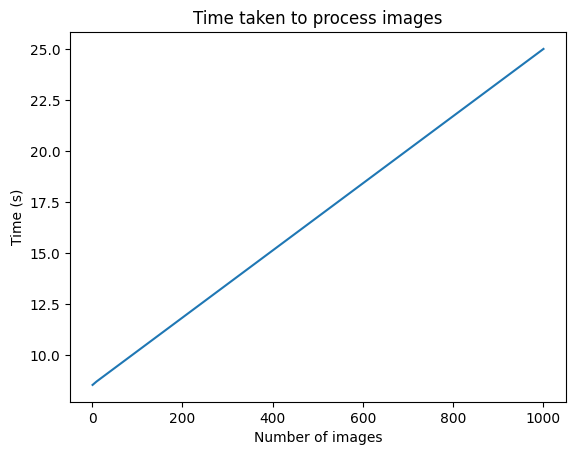

傾き:0.02, 切片:8.54
ONNX Runtime GPU 1枚当たりの処理時間: 0.02秒, 立ち上げ時間: 8.54秒


In [11]:
from matplotlib import pyplot as plt
import numpy as np

x = [1, 10, 1000]
y = [8.55, 8.72, 25]
plt.xlabel('Number of images')
plt.ylabel('Time (s)')
plt.title('Time taken to process images')

plt.plot(x, y)
plt.show()

a,b = np.polyfit(x,y,1)
a = round(a, 2)
b = round(b, 2)
print(f"傾き:{a}, 切片:{b}")
print(f"ONNX Runtime GPU 1枚当たりの処理時間: {a}秒, 立ち上げ時間: {b}秒")

# FastAPIとONNX Runtimeの比較

FastAPI CPU 1枚当たりの処理時間: 0.29秒, 立ち上げ時間: 4.23秒  
FastAPI GPU 1枚当たりの処理時間: 0.02秒, 立ち上げ時間: 4.12秒  

ONNX Runtime CPU 1枚当たりの処理時間: 0.14秒, 立ち上げ時間: 0.26秒  
ONNX Runtime GPU 1枚当たりの処理時間: 0.02秒, 立ち上げ時間: 8.54秒   